In [1]:
import json
import pandas as pd

import sqlite3
import nltk
import spacy
import geopandas as gpd
import numpy as np
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_json('/Users/robholmstrom/Downloads/covid_19_dataset_2020_06_10/yelp_academic_dataset_covid_features.json', lines=True)

In [3]:
df2 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_review.json', lines = True)

In [4]:
df3 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_business.json', lines = True)

In [5]:
df4 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json', lines = True)

In [6]:
df5 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_tip.json', lines = True)

In [7]:
df6 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_user.json', lines = True)

In [5]:
census = pd.read_csv('/Users/robholmstrom/Downloads/zipcode2017/17zpallnoagi.csv')
census = census.loc[census['ZIPCODE']>0]
census.rename(columns={'ZIPCODE':'postal_code'}, inplace = True)
census.postal_code= census.postal_code.astype('str').str.strip()


In [6]:
census.head()

,STATEFIPS,STATE,postal_code,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
1,1,AL,35004,0,5130.0,2140.0,2120.0,780.0,4660.0,270.0,...,30.0,32.0,970.0,2693.0,4090.0,11048.0,4020.0,10706.0,70.0,308.0
2,1,AL,35005,0,3170.0,1350.0,870.0,900.0,2840.0,150.0,...,0.0,0.0,450.0,964.0,2660.0,7591.0,2640.0,7552.0,0.0,0.0
3,1,AL,35006,0,1210.0,440.0,580.0,170.0,1120.0,50.0,...,0.0,0.0,190.0,466.0,990.0,2822.0,990.0,2812.0,0.0,0.0
4,1,AL,35007,0,11930.0,4720.0,5180.0,1790.0,10270.0,990.0,...,110.0,90.0,2720.0,9363.0,8960.0,24472.0,8840.0,23758.0,150.0,664.0
5,1,AL,35010,0,7890.0,3000.0,2710.0,2060.0,7250.0,360.0,...,100.0,688.0,1240.0,5871.0,6520.0,20994.0,6380.0,19360.0,170.0,1631.0


In [7]:
lens = [len(x) for x in census.postal_code]
set(lens)

{4, 5}

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 550.8+ MB


In [9]:
from datetime import datetime

In [10]:
review_by_year = df2.date.dt.year.value_counts()

In [11]:
review_by_year.values

array([1318054, 1217292, 1215836, 1094154,  940603,  702060,  491678,
        367367,  302523,  186752,  100760,   56996,   21130,    5030,
           875,      12])

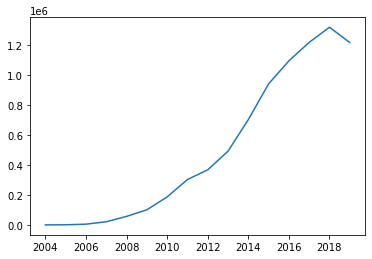

In [12]:
sns.lineplot(review_by_year.index,review_by_year.values )

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [14]:
import matplotlib.pyplot as plt
plt.barh(df3.city.value_counts()[df3.city.value_counts()>5000])

TypeError: barh() missing 1 required positional argument: 'width'

In [15]:
df3.city.value_counts()>1000

Las Vegas               True
Toronto                 True
Phoenix                 True
Charlotte               True
Scottsdale              True
                       ...  
Bedford Hts.           False
Elrama                 False
Cleveland              False
Old Town Scottsdale    False
TEMPE                  False
Name: city, Length: 1251, dtype: bool

In [16]:
df3.city.value_counts()[df3.city.value_counts()>1000]

Las Vegas          31631
Toronto            20366
Phoenix            20171
Charlotte          10422
Scottsdale          9342
Calgary             8377
Pittsburgh          7630
Montréal            6979
Mesa                6577
Henderson           5272
Tempe               4797
Chandler            4580
Cleveland           3857
Glendale            3824
Gilbert             3745
Madison             3685
Mississauga         3518
Peoria              2080
Markham             1963
North Las Vegas     1677
Champaign           1327
North York          1319
Scarborough         1244
Surprise            1218
Richmond Hill       1153
Brampton            1146
Concord             1125
Vaughan             1045
Name: city, dtype: int64

In [17]:
df4.info()

NameError: name 'df4' is not defined

In [18]:
df5.info()

NameError: name 'df5' is not defined

In [19]:
df6.info()

NameError: name 'df6' is not defined

In [20]:
df3.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [21]:
df3_v2 = df3.copy()[['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories']]

In [22]:
df3_v2['categories'].fillna(value=np.nan, inplace = True)

In [23]:
df3_v2.dropna(inplace= True)

In [24]:
df3lite = df3_v2[df3_v2['categories'].str.contains('Restaurant')|
                 df3_v2['categories'].str.contains('Coffee & Tea')]

In [25]:
con = sqlite3.connect('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/sqlite/test.db')


# Write the new DataFrame to a new SQLite table
df3lite.to_sql("df3lite", con, if_exists="replace")
# df4.to_sql("df4", con, if_exists="replace")
# df5.to_sql("df5", con, if_exists="replace")
# df6.to_sql("df6", con, if_exists="replace")
con.close()

In [26]:
[x for x in df3.columns if df3[x].dtype=='float64']

['latitude', 'longitude', 'stars']

In [27]:
df_rest = df3lite.copy()

In [28]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 8 to 209390
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   68065 non-null  object 
 1   name          68065 non-null  object 
 2   address       68065 non-null  object 
 3   city          68065 non-null  object 
 4   state         68065 non-null  object 
 5   postal_code   68065 non-null  object 
 6   latitude      68065 non-null  float64
 7   longitude     68065 non-null  float64
 8   stars         68065 non-null  float64
 9   review_count  68065 non-null  int64  
 10  is_open       68065 non-null  int64  
 11  categories    68065 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 6.8+ MB


In [29]:
food_cats = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/Yelp_food_categories.csv')
food_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Categories   0 non-null      float64
 1   Food_types   69 non-null     object 
 2   Ethnicities  96 non-null     object 
 3   Venue_type   51 non-null     object 
dtypes: float64(1), object(3)
memory usage: 6.9+ KB


In [30]:
food_types = food_cats['Food_types'].dropna().str.strip().str.replace(' ', '')
ethnicities = food_cats['Ethnicities'].dropna().str.strip().str.replace(' ', '')
venue_types = food_cats['Venue_type'].dropna().str.strip().str.replace(' ', '')
food_types

0              AcaiBowls
1                 Bagels
2               Bakeries
3      Beer,Wine&Spirits
7              BubbleTea
             ...        
207    Tapas/SmallPlates
213                Vegan
214           Vegetarian
216              Waffles
217                Wraps
Name: Food_types, Length: 69, dtype: object

In [31]:
cat_list = df_rest['categories'].str.replace(' ', '' ).str.replace(',', ', ')

In [32]:
cat_list

8         EthnicFood, FoodTrucks, SpecialtyFood, Importe...
20                Food, Restaurants, Grocery, MiddleEastern
24                   Restaurants, Cheesesteaks, Poutineries
25               Japanese, FastFood, FoodCourt, Restaurants
30        Persian/Iranian, Turkish, MiddleEastern, Resta...
                                ...                        
209381       Nightlife, Diners, Bars, Southern, Restaurants
209383    Restaurants, Sandwiches, Food, Breakfast&Brunc...
209385    Restaurants, Pizza, Sandwiches, FastFood, Chic...
209388                     Japanese, SushiBars, Restaurants
209390    American(New), Food, Burgers, Restaurants, Fas...
Name: categories, Length: 68065, dtype: object

In [33]:
cat_list[0:1].str[1:2].values

array(['t'], dtype=object)

In [34]:
df_rest['categories_fixed']=cat_list

In [35]:
df_rest

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,categories_fixed
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...","EthnicFood, FoodTrucks, SpecialtyFood, Importe..."
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern","Food, Restaurants, Grocery, MiddleEastern"
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries","Restaurants, Cheesesteaks, Poutineries"
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"Japanese, Fast Food, Food Court, Restaurants","Japanese, FastFood, FoodCourt, Restaurants"
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"Persian/Iranian, Turkish, Middle Eastern, Rest...","Persian/Iranian, Turkish, MiddleEastern, Resta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"Nightlife, Diners, Bars, Southern, Restaurants","Nightlife, Diners, Bars, Southern, Restaurants"
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"Restaurants, Sandwiches, Food, Breakfast & Bru...","Restaurants, Sandwiches, Food, Breakfast&Brunc..."
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"Restaurants, Pizza, Sandwiches, Fast Food, Chi...","Restaurants, Pizza, Sandwiches, FastFood, Chic..."
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"Japanese, Sushi Bars, Restaurants","Japanese, SushiBars, Restaurants"


In [36]:
food_types.values

array(['AcaiBowls', 'Bagels', 'Bakeries', 'Beer,Wine&Spirits',
       'BubbleTea', 'ChimneyCakes', 'Cupcakes', 'CustomCakes', 'Desserts',
       'Donuts', 'Empanadas', 'Gelato', 'Honey', 'IceCream&FrozenYogurt',
       'ImportedFood', 'JuiceBars&Smoothies', 'Kombucha', 'Meaderies',
       'Piadina', 'Poke', 'Pretzels', 'ShavedIce', 'ShavedSnow',
       'Fruits&Veggies', 'Herbs&Spices', 'Macarons', 'OliveOil',
       'Breakfast&Brunch', 'Pancakes', 'Buffets', 'Burgers',
       'Cheesesteaks', 'ChickenWings', 'DimSum', 'ComfortFood',
       'Creperies', 'FastFood', 'Fish&Chips', 'Fondue', 'GameMeat',
       'HotDogs', 'HotPot', 'ConveyorBeltSushi', 'Izakaya',
       'JapaneseCurry', 'Ramen', 'Teppanyaki', 'Kebab', 'Kosher',
       'Live/RawFood', 'Falafel', 'Tacos', 'Noodles', 'PanAsia', 'Pizza',
       'Polish', 'Polynesian', 'Poutineries', 'Salad', 'Sandwiches',
       'Seafood', 'SoulFood', 'Soup', 'Southern', 'Tapas/SmallPlates',
       'Vegan', 'Vegetarian', 'Waffles', 'Wraps'], dty

In [37]:
df_rest['categories_fixed'][0:1]

8    EthnicFood, FoodTrucks, SpecialtyFood, Importe...
Name: categories_fixed, dtype: object

In [38]:
type_list = []

for x in df_rest['categories_fixed']:
    sublist = []
    for i in food_types:
        if i in x:
            sublist.append(i)
    
    if len(sublist) == 0:
        type_list.append(['other'])
    else:
        type_list.append(sublist)  
print(len(type_list))
print(df_rest.shape[0])
type_list

68065
68065


[['Empanadas', 'ImportedFood'],
 ['other'],
 ['Cheesesteaks', 'Poutineries'],
 ['FastFood'],
 ['Kebab'],
 ['Donuts', 'JuiceBars&Smoothies'],
 ['Bakeries', 'Pretzels', 'FastFood'],
 ['FastFood'],
 ['Burgers'],
 ['Soup'],
 ['Burgers', 'ChickenWings'],
 ['other'],
 ['other'],
 ['other'],
 ['Burgers', 'FastFood', 'HotDogs'],
 ['Burgers', 'FastFood'],
 ['other'],
 ['other'],
 ['other'],
 ['Burgers', 'FastFood'],
 ['Pizza'],
 ['other'],
 ['Buffets'],
 ['Breakfast&Brunch', 'Salad'],
 ['Pizza'],
 ['other'],
 ['Sandwiches'],
 ['Breakfast&Brunch', 'Sandwiches'],
 ['Tapas/SmallPlates'],
 ['Sandwiches'],
 ['FastFood'],
 ['Fish&Chips'],
 ['other'],
 ['Pizza'],
 ['Fish&Chips', 'Seafood'],
 ['IceCream&FrozenYogurt', 'Sandwiches'],
 ['Bagels', 'Bakeries', 'Donuts'],
 ['Breakfast&Brunch'],
 ['Pizza'],
 ['other'],
 ['Pizza'],
 ['other'],
 ['ComfortFood'],
 ['Breakfast&Brunch'],
 ['Donuts'],
 ['HotDogs'],
 ['other'],
 ['Sandwiches'],
 ['other'],
 ['FastFood'],
 ['Sandwiches'],
 ['FastFood', 'Sandwiches']

In [39]:
venue_list = []

for x in df_rest['categories_fixed']:
    sublist = []
    for i in venue_types:
        if i in x:
            sublist.append(i)
    
    if len(sublist) == 0:
        venue_list.append(['other'])
    else:
        venue_list.append(sublist)  
print(len(venue_list))
print(df_rest.shape[0])


68065
68065


In [40]:
ethnicity_list = []

for x in df_rest['categories_fixed']:
    sublist = []
    for i in ethnicities:
        if i in x:
            sublist.append(i)
    
    if len(sublist) == 0:
        ethnicity_list.append(['other'])
    else:
        ethnicity_list.append(sublist)  
print(len(ethnicity_list))
print(df_rest.shape[0])


68065
68065


In [41]:
df_rest['food_type'] = type_list
df_rest['ethnicity'] = ethnicity_list
df_rest['venue'] = venue_list


In [42]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 8 to 209390
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       68065 non-null  object 
 1   name              68065 non-null  object 
 2   address           68065 non-null  object 
 3   city              68065 non-null  object 
 4   state             68065 non-null  object 
 5   postal_code       68065 non-null  object 
 6   latitude          68065 non-null  float64
 7   longitude         68065 non-null  float64
 8   stars             68065 non-null  float64
 9   review_count      68065 non-null  int64  
 10  is_open           68065 non-null  int64  
 11  categories        68065 non-null  object 
 12  categories_fixed  68065 non-null  object 
 13  food_type         68065 non-null  object 
 14  ethnicity         68065 non-null  object 
 15  venue             68065 non-null  object 
dtypes: float64(3), int64(2), object(11)
mem

In [43]:
df_rest['categories_fixed'][0:1].values.flatten()

array(['EthnicFood, FoodTrucks, SpecialtyFood, ImportedFood, Argentine, Food, Restaurants, Empanadas'],
      dtype=object)

In [44]:
type(df_rest['categories'][0:1].values)

numpy.ndarray

In [45]:
df_rest

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,categories_fixed,food_type,ethnicity,venue
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...","EthnicFood, FoodTrucks, SpecialtyFood, Importe...","[Empanadas, ImportedFood]",[Argentine],"[FoodTrucks, SpecialtyFood]"
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern","Food, Restaurants, Grocery, MiddleEastern",[other],[MiddleEastern],[Grocery]
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries","Restaurants, Cheesesteaks, Poutineries","[Cheesesteaks, Poutineries]",[other],[other]
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"Japanese, Fast Food, Food Court, Restaurants","Japanese, FastFood, FoodCourt, Restaurants",[FastFood],[Japanese],[FoodCourt]
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"Persian/Iranian, Turkish, Middle Eastern, Rest...","Persian/Iranian, Turkish, MiddleEastern, Resta...",[Kebab],"[MiddleEastern, Persian/Iranian, Turkish]",[other]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"Nightlife, Diners, Bars, Southern, Restaurants","Nightlife, Diners, Bars, Southern, Restaurants",[Southern],[other],[Diners]
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"Restaurants, Sandwiches, Food, Breakfast & Bru...","Restaurants, Sandwiches, Food, Breakfast&Brunc...","[Bagels, Breakfast&Brunch, Sandwiches]",[other],[other]
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"Restaurants, Pizza, Sandwiches, Fast Food, Chi...","Restaurants, Pizza, Sandwiches, FastFood, Chic...","[ChickenWings, FastFood, Pizza, Sandwiches]",[other],[other]
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"Japanese, Sushi Bars, Restaurants","Japanese, SushiBars, Restaurants",[other],[Japanese],[SushiBars]


In [46]:
df_rest['food_comb'] = (df_rest['food_type']+df_rest['ethnicity']+df_rest['venue']).apply(lambda x: ' '.join(x))

In [47]:
df_rest

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,categories_fixed,food_type,ethnicity,venue,food_comb
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...","EthnicFood, FoodTrucks, SpecialtyFood, Importe...","[Empanadas, ImportedFood]",[Argentine],"[FoodTrucks, SpecialtyFood]",Empanadas ImportedFood Argentine FoodTrucks Sp...
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern","Food, Restaurants, Grocery, MiddleEastern",[other],[MiddleEastern],[Grocery],other MiddleEastern Grocery
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries","Restaurants, Cheesesteaks, Poutineries","[Cheesesteaks, Poutineries]",[other],[other],Cheesesteaks Poutineries other other
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"Japanese, Fast Food, Food Court, Restaurants","Japanese, FastFood, FoodCourt, Restaurants",[FastFood],[Japanese],[FoodCourt],FastFood Japanese FoodCourt
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"Persian/Iranian, Turkish, Middle Eastern, Rest...","Persian/Iranian, Turkish, MiddleEastern, Resta...",[Kebab],"[MiddleEastern, Persian/Iranian, Turkish]",[other],Kebab MiddleEastern Persian/Iranian Turkish other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"Nightlife, Diners, Bars, Southern, Restaurants","Nightlife, Diners, Bars, Southern, Restaurants",[Southern],[other],[Diners],Southern other Diners
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"Restaurants, Sandwiches, Food, Breakfast & Bru...","Restaurants, Sandwiches, Food, Breakfast&Brunc...","[Bagels, Breakfast&Brunch, Sandwiches]",[other],[other],Bagels Breakfast&Brunch Sandwiches other other
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"Restaurants, Pizza, Sandwiches, Fast Food, Chi...","Restaurants, Pizza, Sandwiches, FastFood, Chic...","[ChickenWings, FastFood, Pizza, Sandwiches]",[other],[other],ChickenWings FastFood Pizza Sandwiches other o...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"Japanese, Sushi Bars, Restaurants","Japanese, SushiBars, Restaurants",[other],[Japanese],[SushiBars],other Japanese SushiBars


In [48]:
import plotly.express as px

In [49]:
df3['city'].value_counts()['Cornelius']

495

In [50]:
select = df_rest['city'].value_counts()[df_rest['city'].value_counts()>1].index

In [51]:
select

Index(['Toronto', 'Las Vegas', 'Phoenix', 'Montréal', 'Calgary', 'Charlotte',
       'Pittsburgh', 'Scottsdale', 'Mississauga', 'Cleveland',
       ...
       'Rawdon', 'Cuyahoga Fls', 'Sturgeon', 'Mcmurray', 'Walton Hills',
       'Nellis Air Force Base', 'LAS VEGAS', 'Marshall', 'Venetia',
       'Port Credit'],
      dtype='object', length=520)

In [52]:
df_select = df_rest[df_rest['city'].isin(select)]

In [53]:
df_mini = df_select[df_select['review_count']>10]

In [54]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45652 entries, 36 to 209390
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       45652 non-null  object 
 1   name              45652 non-null  object 
 2   address           45652 non-null  object 
 3   city              45652 non-null  object 
 4   state             45652 non-null  object 
 5   postal_code       45652 non-null  object 
 6   latitude          45652 non-null  float64
 7   longitude         45652 non-null  float64
 8   stars             45652 non-null  float64
 9   review_count      45652 non-null  int64  
 10  is_open           45652 non-null  int64  
 11  categories        45652 non-null  object 
 12  categories_fixed  45652 non-null  object 
 13  food_type         45652 non-null  object 
 14  ethnicity         45652 non-null  object 
 15  venue             45652 non-null  object 
 16  food_comb         45652 non-null  obje

In [55]:
# df3mini_minusgeo = df3mini.drop(columns = 'geometry')
# con = sqlite3.connect('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/sqlite/test.db')


# # Write the new DataFrame to a new SQLite table
# df3mini_minusgeo.to_sql("df3mini_minusgeo", con, if_exists="replace")
# # df4.to_sql("df4", con, if_exists="replace")
# # df5.to_sql("df5", con, if_exists="replace")
# # df6.to_sql("df6", con, if_exists="replace")
# con.close()

In [56]:
# fig = px.scatter_geo(df_mini, 'latitude', 'longitude', scope ='north america', color = 'city')
# fig.update_traces(marker=dict(size=1))

In [57]:
df = gpd.read_file('/Users/robholmstrom/Downloads/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')


In [58]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


In [59]:
yelp = gpd.GeoDataFrame(df_mini, 
                        geometry= gpd.points_from_xy(df_mini['longitude'], df_mini['latitude']))

In [60]:
yelp

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,categories_fixed,food_type,ethnicity,venue,food_comb,geometry
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"Mexican, Restaurants, Fast Food","Mexican, Restaurants, FastFood",[FastFood],[Mexican],[other],FastFood Mexican other,POINT (-115.30157 36.09974)
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"Restaurants, Burgers, Food","Restaurants, Burgers, Food",[Burgers],[other],[other],Burgers other other,POINT (-79.53177 43.63329)
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"Restaurants, Vietnamese, Soup","Restaurants, Vietnamese, Soup",[Soup],[Vietnamese],[other],Soup Vietnamese other,POINT (-81.66333 41.51216)
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"Restaurants, Lebanese, Middle Eastern","Restaurants, Lebanese, MiddleEastern",[other],"[MiddleEastern, Lebanese]",[other],other MiddleEastern Lebanese other,POINT (-73.65190 45.49487)
46,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,"Burgers, Fast Food, American (New), Restaurant...","Burgers, FastFood, American(New), Restaurants,...","[Burgers, FastFood, HotDogs]",[American(New)],[other],Burgers FastFood HotDogs American(New) other,POINT (-112.18703 33.64039)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209380,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,-112.221142,2.0,106,1,"Nightlife, American (Traditional), Chicken Win...","Nightlife, American(Traditional), ChickenWings...",[ChickenWings],[American(Traditional)],[other],ChickenWings American(Traditional) other,POINT (-112.22114 33.47914)
209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"Nightlife, Diners, Bars, Southern, Restaurants","Nightlife, Diners, Bars, Southern, Restaurants",[Southern],[other],[Diners],Southern other Diners,POINT (-89.37401 43.08102)
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"Restaurants, Sandwiches, Food, Breakfast & Bru...","Restaurants, Sandwiches, Food, Breakfast&Brunc...","[Bagels, Breakfast&Brunch, Sandwiches]",[other],[other],Bagels Breakfast&Brunch Sandwiches other other,POINT (-81.92140 41.41657)
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"Restaurants, Pizza, Sandwiches, Fast Food, Chi...","Restaurants, Pizza, Sandwiches, FastFood, Chic...","[ChickenWings, FastFood, Pizza, Sandwiches]",[other],[other],ChickenWings FastFood Pizza Sandwiches other o...,POINT (-80.81836 35.07854)


In [61]:
yelp[yelp['state']=='PA']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,categories_fixed,food_type,ethnicity,venue,food_comb,geometry
63,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,311 Unity Center Rd,Plum,PA,15239,40.489996,-79.779288,4.0,31,1,"Restaurants, Pizza","Restaurants, Pizza",[Pizza],[other],[other],Pizza other other,POINT (-79.77929 40.49000)
129,OGVHlFHSXjHuioOvm1wVqg,The Jackman Bar & Restaurant,918 Jackman Ave,Avalon,PA,15202,40.496381,-80.065479,4.0,13,1,"Dive Bars, Restaurants, Comfort Food, Bars, Ni...","DiveBars, Restaurants, ComfortFood, Bars, Nigh...",[ComfortFood],[other],[other],ComfortFood other other,POINT (-80.06548 40.49638)
200,GvCblda5MdYBqNFBUlHuyg,Barb's Country Junction Cafe,202 3rd Ave,Carnegie,PA,15106,40.404608,-80.089939,3.5,11,1,"Restaurants, Cafes","Restaurants, Cafes",[other],[other],[Cafes],other other Cafes,POINT (-80.08994 40.40461)
244,goar7zF4G0LdsQ1Y4KS3Iw,Pittsburgh Barbecue Company,1000 Banksville Rd,Pittsburgh,PA,15216,40.419899,-80.030052,4.0,91,1,"Caterers, Event Planning & Services, Restauran...","Caterers, EventPlanning&Services, Restaurants,...",[other],[Barbeque],[other],other Barbeque other,POINT (-80.03005 40.41990)
275,GDf1SI_SnW93_lJN__egrQ,Kings,2100 Washington Pike,Carnegie,PA,15106,40.387138,-80.094068,3.5,22,0,"Breakfast & Brunch, Burgers, Restaurants, Amer...","Breakfast&Brunch, Burgers, Restaurants, Americ...","[Breakfast&Brunch, Burgers]",[American(Traditional)],[other],Breakfast&Brunch Burgers American(Traditional)...,POINT (-80.09407 40.38714)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209223,Y-vxPbvPKcaLiYa9ZBXoDg,McDonald's,505 Smithfield St,Pittsburgh,PA,15219,40.440433,-79.998637,1.5,24,0,"Restaurants, Burgers, Hot Dogs, Food, Coffee &...","Restaurants, Burgers, HotDogs, Food, Coffee&Te...","[Burgers, FastFood, HotDogs]",[other],[Coffee&Tea],Burgers FastFood HotDogs other Coffee&Tea,POINT (-79.99864 40.44043)
209244,vpwyL6NHm-pTWJ5IeJb9yw,Cocina Mendoza,300 Mt Lebanon Blvd,Pittsburgh,PA,15234,40.368716,-80.034629,3.5,84,1,"Restaurants, Mexican","Restaurants, Mexican",[other],[Mexican],[other],other Mexican other,POINT (-80.03463 40.36872)
209277,qWcaGio9JsqrvgmQiIRtIQ,Country Style Pizza,536 Dewey Ave,Bridgeville,PA,15017,40.356300,-80.110600,4.0,39,1,"Food, Restaurants, Bakeries, Pizza, Sandwiches","Food, Restaurants, Bakeries, Pizza, Sandwiches","[Bakeries, Pizza, Sandwiches]",[other],[other],Bakeries Pizza Sandwiches other other,POINT (-80.11060 40.35630)
209301,NeM7anGnTOTn7sEJavS3sw,Starbucks,"1597 Washington Pike, Space A-1",Bridgeville,PA,15017,40.381477,-80.095680,4.5,26,1,"Food, Coffee & Tea","Food, Coffee&Tea",[other],[other],[Coffee&Tea],other other Coffee&Tea,POINT (-80.09568 40.38148)


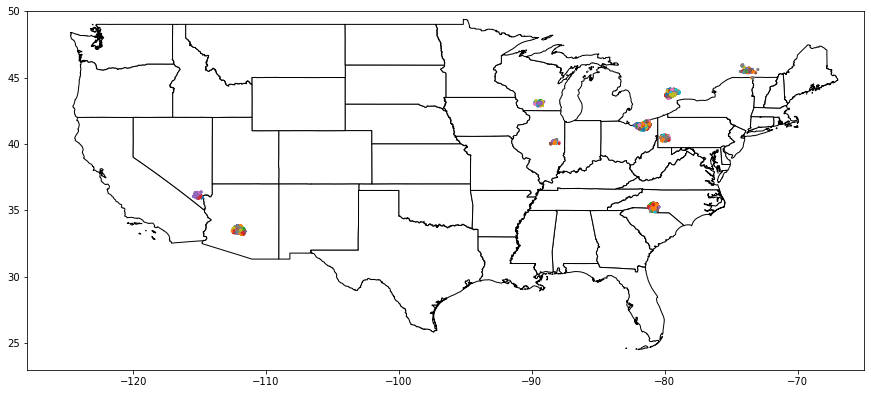

In [62]:
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long
fig, axs = plt.subplots(figsize= (15,15))

df.plot(ax = axs, color='white', edgecolor='black')
plt.xlim(x_lim)
plt.ylim(y_lim)
yelp.plot(ax = axs,marker='o',  markersize=5, column = 'city')
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.show()

In [63]:
from sklearn.cluster import KMeans

In [64]:
dfkm = df_mini[['latitude','longitude']]
dfkm

,latitude,longitude
36,36.099738,-115.301568
38,43.633291,-79.531768
41,41.512155,-81.663332
43,45.494870,-73.651904
46,33.640391,-112.187028
...,...,...
209380,33.479139,-112.221142
209381,43.081022,-89.374006
209383,41.416568,-81.921396
209385,35.078538,-80.818358


In [65]:
km = KMeans(n_clusters = 10)
km.fit_transform(dfkm)
labels = km.labels_

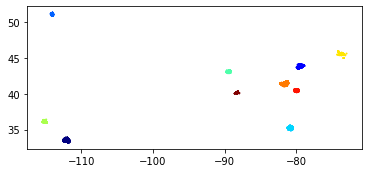

In [66]:
yelp.plot(marker='o',  markersize=1, column = labels, cmap = 'jet')
plt.show()

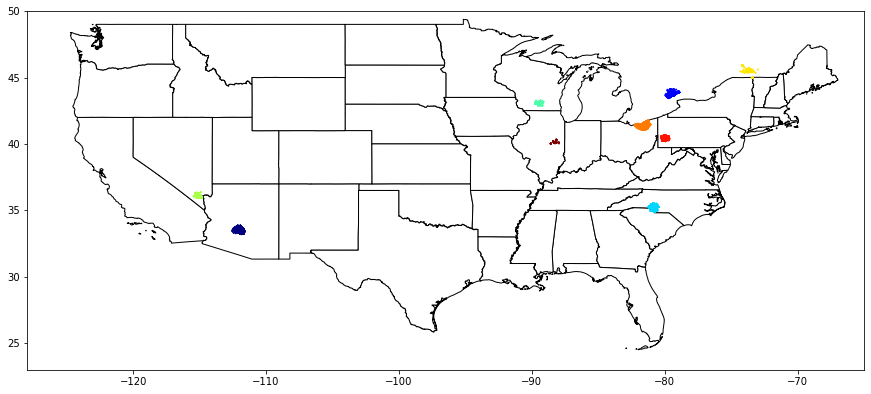

In [67]:
fig, axs = plt.subplots(figsize= (15,15))

df.plot(ax = axs, color='white', edgecolor='black')
plt.xlim(x_lim)
plt.ylim(y_lim)
yelp.plot(ax = axs,marker='o',  markersize=1, column = labels, cmap = 'jet')
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.show()

In [68]:
labels

array([5, 1, 7, ..., 7, 3, 0], dtype=int32)

In [69]:
centers = km.cluster_centers_
centers

array([[  33.48874261, -111.99971317],
       [  43.71284097,  -79.42424748],
       [  51.04805157, -114.07246554],
       [  35.20826262,  -80.83762864],
       [  43.07569671,  -89.40251429],
       [  36.11998823, -115.1752715 ],
       [  45.50878829,  -73.60409848],
       [  41.41518156,  -81.64570094],
       [  40.44248872,  -79.98250925],
       [  40.11744418,  -88.24593503]])

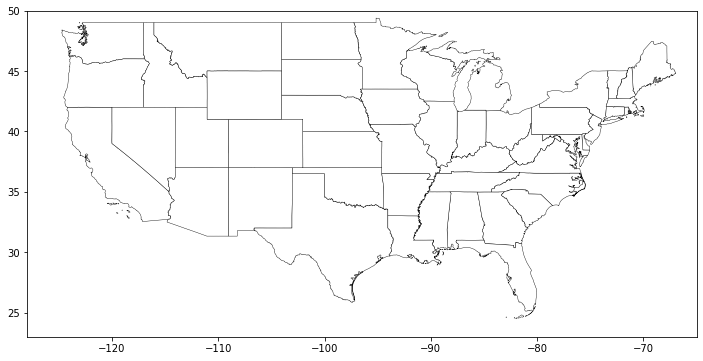

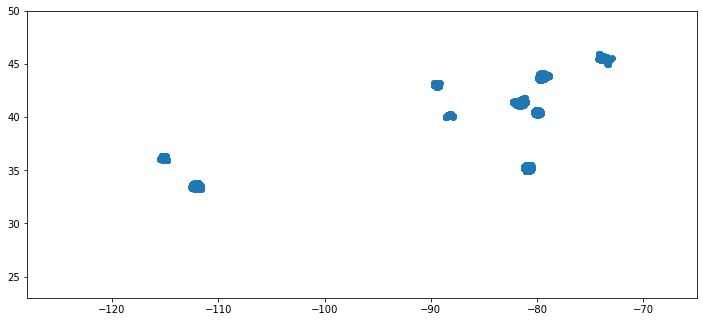

In [70]:
df.plot(figsize = (12, 12), edgecolor = 'black', color = 'white', linewidth = 0.4)
plt.xlim(x_lim)
plt.ylim(y_lim)
yelp.plot(figsize = (12, 12))

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

In [71]:
dfcenters = pd.DataFrame(centers)


In [72]:
df_mini['labels'] = labels



/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df3max = df_mini.groupby('labels')[['longitude', 'latitude']].max().reset_index()
df3min = df_mini.groupby('labels')[['longitude', 'latitude']].min().reset_index()

In [74]:
df3max.rename(columns = {'longitude':'long_max', 'latitude':'lat_max'}, inplace = True)
df3min.rename(columns = {'longitude':'long_min', 'latitude':'lat_min'}, inplace = True)

In [75]:
dfboxed = df3max.merge(df3min, on = 'labels')
dfboxed['hypotenus'] = np.sqrt((dfboxed['long_max']-dfboxed['long_min'])**2 + (dfboxed['lat_max']-dfboxed['lat_min'])**2)

In [76]:
dfboxed

,labels,long_max,lat_max,long_min,lat_min,hypotenus
0,0,-111.600936,33.844710,-112.540321,33.217858,1.129330
1,1,-78.900077,44.135933,-79.935557,43.450976,1.241525
2,2,-113.816408,51.294184,-114.280048,50.876936,0.623745
3,3,-80.450995,35.535299,-81.198970,34.923589,0.966259
4,4,-89.102590,43.252181,-89.748301,42.854301,0.758453
5,5,-114.835450,36.381974,-115.452994,35.920884,0.770691
6,6,-72.985624,45.951990,-74.305759,44.981470,1.638495
7,7,-81.072423,41.764307,-82.242205,41.050342,1.370450
8,8,-79.650452,40.643095,-80.262913,40.202754,0.754327
9,9,-87.958302,40.314510,-88.574065,40.024200,0.680767


In [77]:
hyp = dfboxed['hypotenus'].max()
hyp

1.6384945529886243

In [78]:
added= np.sqrt(((hyp/2)**2)/2)
added

0.5792953046777386

In [79]:
(dfcenters[0][0]-added, dfcenters[1][0]+added)

(32.90944730914593, -111.42041786673813)

In [80]:
dfcenters

,0,1
0,33.488743,-111.999713
1,43.712841,-79.424247
2,51.048052,-114.072466
3,35.208263,-80.837629
4,43.075697,-89.402514
5,36.119988,-115.175272
6,45.508788,-73.604098
7,41.415182,-81.645701
8,40.442489,-79.982509
9,40.117444,-88.245935


In [81]:
from shapely.geometry import Polygon

def box(centers, max_hyp):
    added= np.sqrt(((max_hyp/2)**2)/2)*1.1
    polyframe = gpd.GeoDataFrame()
 
    polylist = []
    for x,y in zip(centers[0],centers[1]):
        topleft = (y-added, x+added)
        topright = (y+added, x+added)
        bottomleft = (y-added, x-added)
        bottomright = (y+added, x-added)
        poly = Polygon([topleft, topright, bottomright, bottomleft])
        polylist.append(poly)
        polyframe = gpd.GeoSeries(polylist)
    return polyframe

In [82]:
boxregs = box(dfcenters, hyp)
boxregs

0    POLYGON ((-112.63694 34.12597, -111.36249 34.1...
1    POLYGON ((-80.06147 44.35007, -78.78702 44.350...
2    POLYGON ((-114.70969 51.68528, -113.43524 51.6...
3    POLYGON ((-81.47485 35.84549, -80.20040 35.845...
4    POLYGON ((-90.03974 43.71292, -88.76529 43.712...
5    POLYGON ((-115.81250 36.75721, -114.53805 36.7...
6    POLYGON ((-74.24132 46.14601, -72.96687 46.146...
7    POLYGON ((-82.28293 42.05241, -81.00848 42.052...
8    POLYGON ((-80.61973 41.07971, -79.34528 41.079...
9    POLYGON ((-88.88316 40.75467, -87.60871 40.754...
dtype: geometry

In [83]:
type(boxregs[0])

shapely.geometry.polygon.Polygon

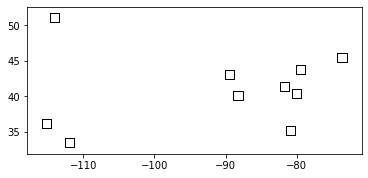

In [84]:
boxregs.plot(color='white', edgecolor='black')

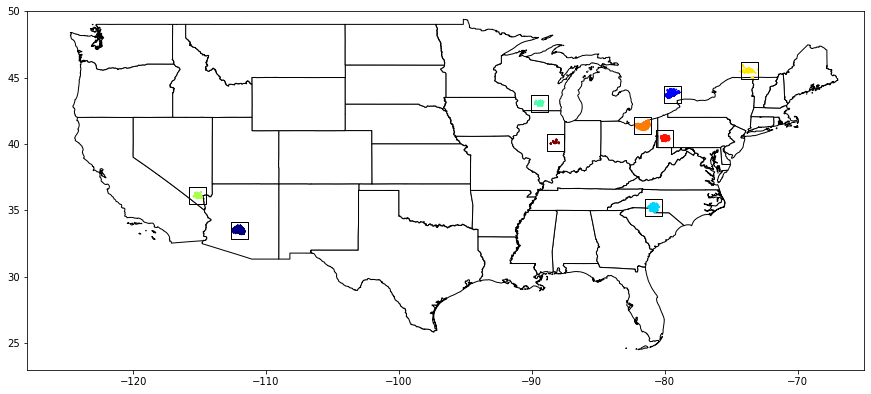

In [85]:
fig, axs = plt.subplots(figsize= (15,15))

df.plot(ax = axs, color='white', edgecolor='black')
plt.xlim(x_lim)
plt.ylim(y_lim)
yelp.plot(ax = axs,marker='o',  markersize=1, column = labels, cmap = 'jet')
plt.xlim(x_lim)
plt.ylim(y_lim)
boxregs.plot(ax = axs, color='none', edgecolor='black')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

In [86]:
yelp['labels'] = labels


In [87]:
box0 = gpd.GeoSeries(boxregs[0])
box1 = gpd.GeoSeries(boxregs[1])
box2 = gpd.GeoSeries(boxregs[2])
box3 = gpd.GeoSeries(boxregs[3])
box4 = gpd.GeoSeries(boxregs[4])
box5 = gpd.GeoSeries(boxregs[5])
box6 = gpd.GeoSeries(boxregs[6])
box7 = gpd.GeoSeries(boxregs[7])
box8 = gpd.GeoSeries(boxregs[8])
box9 = gpd.GeoSeries(boxregs[9])

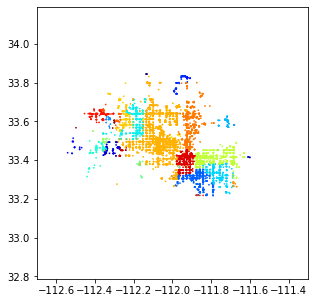

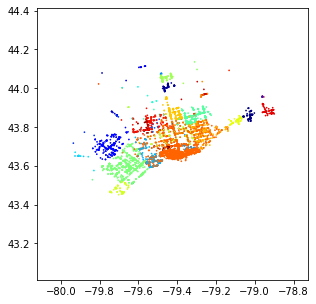

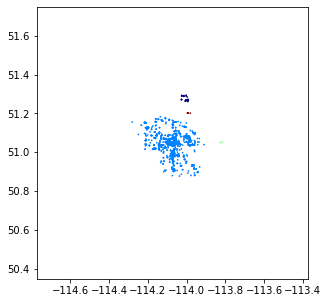

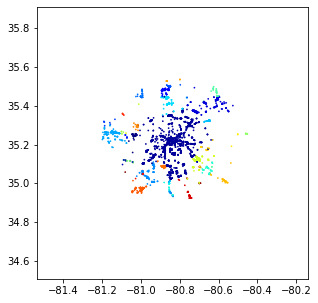

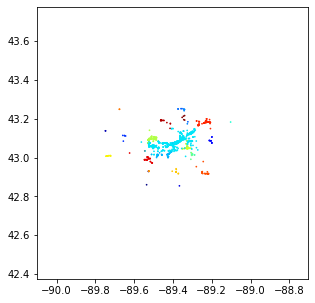

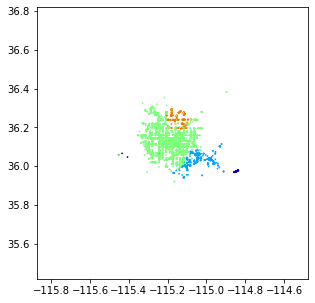

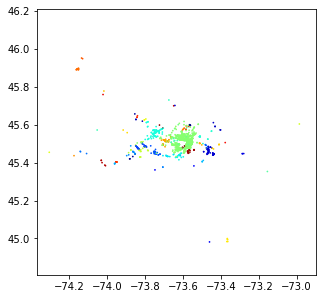

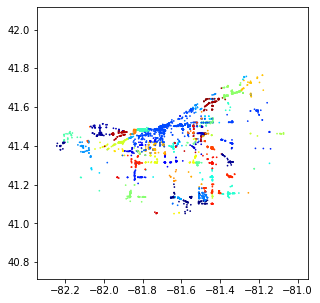

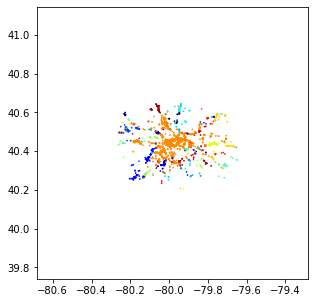

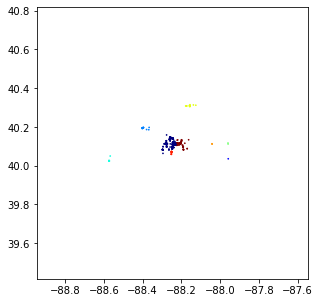

In [88]:
fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==0].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box0.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==1].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box1.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==2].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box2.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==3].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box3.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==4].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box4.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==5].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box5.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==6].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box6.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==7].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box7.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==8].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box8.plot(ax = axs, color = 'none')
plt.show()

fig, axs = plt.subplots(figsize= (5,5))
yelp[yelp['labels']==9].plot(ax = axs,marker='o',  markersize=.5, column = 'city', cmap = 'jet')
box9.plot(ax = axs, color = 'none')
plt.show()

In [89]:
yelp['postal_code'] = yelp['postal_code'].replace('', np.nan)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer

In [91]:
#df_comp = yelp.merge(df2, how = 'left', on = 'business_id')

In [92]:
df_comp = yelp.copy()

In [93]:
df_comp.isnull().sum()

business_id          0
name                 0
address              0
city                 0
state                0
postal_code         25
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
categories           0
categories_fixed     0
food_type            0
ethnicity            0
venue                0
food_comb            0
geometry             0
labels               0
dtype: int64

In [94]:
df_comp['year'] = df_comp.date.dt.year
df_comp['month'] = df_comp.date.dt.month_name
df_comp['weekday'] = df_comp.date.dt.day_name
df_comp['hour'] = df_comp.date.dt.hour

AttributeError: 'GeoDataFrame' object has no attribute 'date'

In [ ]:
df_comp.state.unique()

In [ ]:
df_comp[df_comp['state'].isin(['ON','AB', 'QC'])==False]

In [ ]:
#df_comp_3yrs = df_comp[(df_comp['year'].isin([2019, 2018, 2017])) & (df_comp['state'].isin(['ON','AB', 'QC', 'MB'])==False)]


In [ ]:
df_comp_3yrs = df_comp[(df_comp['state'].isin(['ON','AB', 'QC', 'MB'])==False)]

In [ ]:
df_comp_3yrs = df_comp_3yrs.loc[df_comp_3yrs['state'].isin(['OH', 'PA', 'NV', 'AZ', 'NC', 'WI', 'IL'])]

In [ ]:
df_comp_3yrs[df_comp_3yrs['business_id']=='gTn_YaXUYEC5py8ESrX5Wg'][['postal_code', 'name']]

In [ ]:
census['postal_code']

In [ ]:
test = df_comp_3yrs[['postal_code', 'state']].merge(census[['N1','postal_code']], on='postal_code', how='left')

In [ ]:
test.isnull()['postal_code'].value_counts()

In [ ]:
test.shape

In [ ]:
df_census = df_comp_3yrs.merge(census, how = 'left', on = 'postal_code')

In [ ]:
df_census = df_census.dropna()


In [ ]:
df_census.columns.tolist()

In [ ]:
df_census.to_csv(r'/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_census.csv', index = False)

In [ ]:
vectorizer = CountVectorizer(analyzer='word', min_df=100)
X = vectorizer.fit_transform(df_census['food_comb'])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())


In [ ]:
bow_df.info()

In [ ]:
df_census = df_census.reset_index(drop= True)

In [ ]:
df_census.columns.tolist()

In [ ]:

# bow_df = pd.DataFrame()
# vectorizer = CountVectorizer(analyzer='word')
# X = vectorizer.fit_transform(df_census['categories_fixed'])
# bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
# df_vec = pd.concat([bow_df, df_census], axis=1, ignore_index= True)
df_vec = pd.concat([bow_df, df_census[['stars', 'AGI_STUB']]], axis=1)


In [ ]:
df_vec.columns.tolist()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_vec = df_vec.select_dtypes(include = numerics).dropna()

In [ ]:
df_vec.info()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pcafit = pca.fit_transform(df_vec)

In [ ]:
sns.scatterplot(pcafit[:,0], pcafit[:,1], s = 10)

In [ ]:
df_vec = df_vec[(df_vec != 0).any(axis=1)]
df_vec = df_vec.loc[:, (df_vec != 0).any(axis=0)]

In [ ]:
import umap
up = umap.UMAP(n_neighbors=10,
                      min_dist=.5,
                      metric='correlation').fit_transform(df_vec)
sns.scatterplot(up[:,0], up[:,1])